## Observations and Insights 

### Observations
* Statistical info for each regimen was collected and four distinct regimen having lowest SEM were selected
* Count of mice was highest in Capomulin and Ramicane regimens
* Cumulative distribution of male Vs female mice is even (just 1% difference)
* Of the top four regimen with lowest SEM, only Infubinol showed a single outlier. 
  For this dataset, we can take these as results for predicting effectiveness of treatment.
* Running thru the line plot for single mouse randomly, some have responded early on to treatment 
  and some have taken time. So, overall treatment duration is considered (picking last timepoint for some of the plots).
* Correlation between weight and tumor volume is linear and positive (value close to +1).

### Some Insights
* I could see why data clean up is highly required before use for analysis.
* Random sampling from a good dataset can help to analyze some aspects a bit more deeply.
* Statistical analysis and corelation coefficient were good additions to learning and their importance in analysis.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Set path for the data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mice_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
# total_rows = len(mice_study.index)  #1893 (or) df["col"].count()
# mice_count = len(list(mice_study["Mouse ID"].value_counts())) # 249 unique

mice_count = mice_study["Mouse ID"].nunique()
print(f"Count of mice in dataset is {mice_count}")

Count of mice in dataset is 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_list = list(mice_study[mice_study[["Mouse ID", "Timepoint"]].duplicated() == True]["Mouse ID"].unique())
print(f"ID(s) of mice that are duplicated for columns Mouse ID and Timepoint: {dup_mice_list}")

ID(s) of mice that are duplicated for columns Mouse ID and Timepoint: ['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = mice_study[mice_study["Mouse ID"].isin(dup_mice_list)]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice_df = mice_study[~mice_study["Mouse ID"].isin(dup_mice_list)]
# Display preview of clean Dataframe
cleaned_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = cleaned_mice_df["Mouse ID"].nunique()
print(f"Count of mice after removing duplicates: {cleaned_mice_count}")

Count of mice after removing duplicates: 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate results
tumor_vol_mean = cleaned_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_vol_median = cleaned_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_vol_var = cleaned_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_vol_std = cleaned_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_vol_sem = cleaned_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": tumor_vol_mean, "Median": tumor_vol_median, "Variance": tumor_vol_var,
                           "Std Deviation": tumor_vol_std, "Std. Error of Mean": tumor_vol_sem
                          })
summary_df

,Mean,Median,Variance,Std Deviation,Std. Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of 
# the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_df2 = cleaned_mice_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": 
                                                            ["mean", "median", "var", "std", "sem"]}) 
# summary_df2.columns = ["Mean", "Median", "Variance", "Std. Deviation", "Std. Error of Mean"]
# summary_df2 = summary_df2.reset_index()
# summary_df2.style.hide(axis='index')
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
mice_vdf = cleaned_mice_df.groupby("Drug Regimen")["Mouse ID"].count()

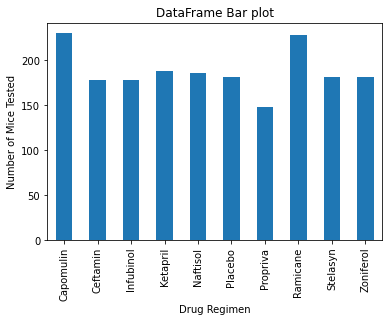

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
barplot = mice_vdf.plot(y="Timepoint", x="Drug Regimen", kind="bar", title="DataFrame Bar plot",
                        ylabel="Number of Mice Tested", xlabel="Drug Regimen")
plt.show()

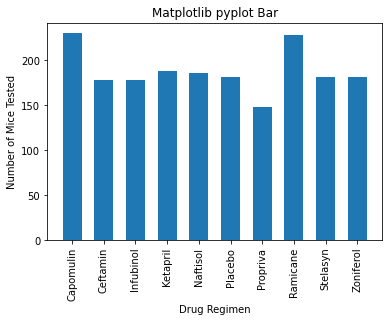

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
list_x_dregimen = mice_vdf.index.tolist()
list_y_mcounts = mice_vdf.values.tolist()
x = np.arange(len(list_x_dregimen))

plt.bar(x, list_y_mcounts, color="tab:blue", align="center", width=0.6)
tick_locations = [a for a in x]
plt.xticks(tick_locations, list_x_dregimen, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Matplotlib pyplot Bar")
plt.show()

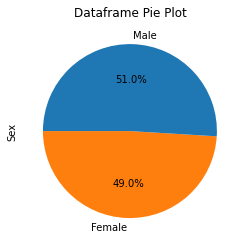

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_colors = ["tab:orange", "tab:blue"]
gender_pie = cleaned_mice_df.groupby("Sex")["Mouse ID"].count()
gender_pie.plot(kind="pie", ylabel="Sex", autopct="%1.1f%%", colors=pie_colors, startangle=180, 
                title="Dataframe Pie Plot")
plt.show()

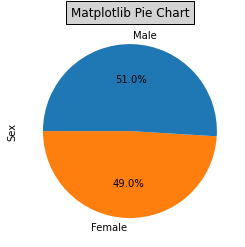

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = gender_pie.index.tolist()
pie_sizes = gender_pie.values.tolist()

plt.pie(pie_sizes, labels=pie_labels, colors=pie_colors, autopct="%1.1f%%", startangle=180, radius=1)
plt.title("Matplotlib Pie Chart", bbox={'facecolor':'lightgrey', 'pad':5})
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = summary_df.loc[summary_df["Std. Error of Mean"] < 0.5].index.to_list()

# Start by getting the last (greatest) timepoint for each mouse
#max_df = cleaned_mice_df[cleaned_mice_df["Drug Regimen"].isin(regimen_list)].groupby("Mouse ID").max()

max_df = cleaned_mice_df.loc[cleaned_mice_df["Drug Regimen"].isin(regimen_list),["Mouse ID", "Timepoint"]]
max_df = max_df.groupby(["Mouse ID"], sort=False)["Timepoint"].max().reset_index()      

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_mice_vol = pd.merge(max_df, cleaned_mice_df, how="inner", on=["Mouse ID", "Timepoint"])
max_mice_vol.head(1)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,45,Ramicane,Male,21,16,22.050126,1


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# altering order to match results
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting); also for box plot
tvol_all = []

# Define function to return outliers for specific column conditioned by filters
def get_outliers(in_series):
            
    # Calculate the IQR and quantitatively determine if there are any potential outliers.    
    quartiles = in_series.quantile([.25, .50, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outseries = in_series.where((in_series < lower_bound) | (in_series > upper_bound)).dropna()
    
    return outseries
 
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for i in range(0, len(max_mice_vol)):
    tvolume = float(max_mice_vol.loc[i, "Tumor Volume (mm3)"])
    if tvolume not in tvol_all:
        tvol_all.append(tvolume)    
    
# add subset 
for regimen in regimen_list:
        matchcol = "Drug Regimen"
        outliercol = "Tumor Volume (mm3)" 
        temp_df = max_mice_vol.loc[max_mice_vol[matchcol] == regimen, [outliercol]]
        ts = temp_df.iloc[:,0]
        
        # save the tumor volume for each regimen as list for use in box plot
        if regimen == "Capomulin":
            tv_1 = ts.tolist()
        elif regimen == "Ramicane":
            tv_2 = ts.tolist()
        elif regimen == "Infubinol":
            tv_3 = ts.tolist()
        else:
            tv_4 = ts.tolist()
        
        # call function to give outliers and print results
        outliers = get_outliers(ts)
        print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


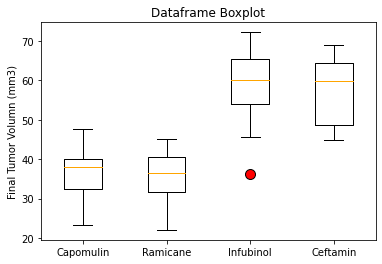

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tvdf = pd.DataFrame({"Capomulin": tv_1,
                     "Ramicane": tv_2,
                     "Infubinol": tv_3,
                     "Ceftamin": tv_4
                    })

ax = tvdf.plot(kind='box', grid=False, color='black', medianprops=dict(color="orange"), 
               flierprops=dict(markerfacecolor='red', markersize=10), title="Dataframe Boxplot")
ax.set_ylabel("Final Tumor Volumn (mm3)")
plt.show()

## Line and Scatter Plots

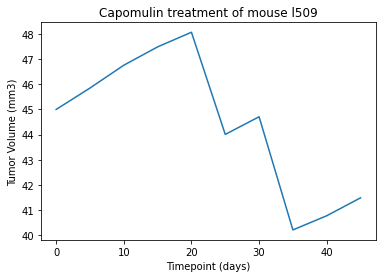

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = "l509"
m509_df = cleaned_mice_df.loc[cleaned_mice_df["Mouse ID"] == mouse_id, ["Timepoint", "Tumor Volume (mm3)"]]
tvolume = m509_df.iloc[:,1].tolist()
tpoints = m509_df.iloc[:,0].tolist()
plt.plot(tpoints, tvolume)

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

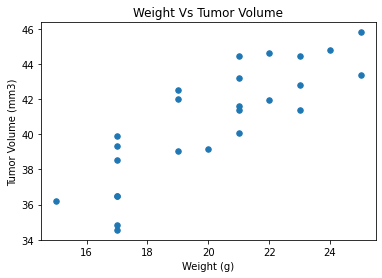

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mice = cleaned_mice_df.loc[cleaned_mice_df["Drug Regimen"] == "Capomulin", 
                               ["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
cap_mice_avg = cap_mice.groupby("Mouse ID").mean()
cap_mice_avg.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=30, title="Weight Vs Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


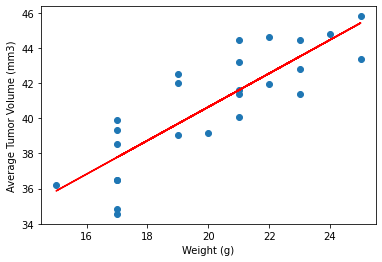

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_mice_avg['Weight (g)']
y_values = cap_mice_avg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
      
plt.show()